# 📊 Notebook 05: Exploratory Data Analysis (EDA)

**Autor:** Gian  
**Fecha:** 2026-01-19  
**Objetivo:** Realizar análisis exploratorio profundo del dataset transformado  

---

## 📋 Contenido

1. Configuración del entorno
2. Carga de datos transformados
3. Análisis univariado
4. Análisis bivariado
5. Análisis de correlaciones
6. Análisis de la variable objetivo (Churn)
7. Análisis de segmentos de clientes
8. Conclusiones y hallazgos clave

---
## 1. Configuración del Entorno

In [30]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats

# Configuración
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 8)

# Paleta de colores personalizada
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'success': '#06A77D',
    'danger': '#D62246',
    'warning': '#F18F01',
    'churn': '#D62246',
    'no_churn': '#06A77D'
}

# Seed
np.random.seed(42)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


---
## 2. Carga de Datos Transformados

In [31]:
# Rutas
OUTPUT_PATH = Path("../../outputs/gian")
DATA_PATH = OUTPUT_PATH / "data" / "04_data_transformed.csv"
FIGURES_PATH = OUTPUT_PATH / "figures" / "eda"
REPORTS_PATH = OUTPUT_PATH / "reports"

# Crear carpetas si no existen
FIGURES_PATH.mkdir(parents=True, exist_ok=True)
REPORTS_PATH.mkdir(parents=True, exist_ok=True)

# Cargar datos transformados
df = pd.read_csv(DATA_PATH)

print(f"✅ Dataset cargado: {df.shape[0]:,} registros × {df.shape[1]} columnas")
print(f"💾 Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✅ Dataset cargado: 9,701 registros × 101 columnas
💾 Memoria: 10.60 MB


In [32]:
# Vista general del dataset
print("📊 Primeras filas del dataset:")
print()
df.head()

📊 Primeras filas del dataset:



,cliente_id,genero,edad,pais,ciudad,es_mayor,tiene_pareja,tiene_dependientes,latitud,longitud,borough,codigo_postal,estado,fecha_registro,ingreso_mediano,densidad_poblacional,antiguedad,cargo_mensual,ingresos_totales,errores_pago,aumento_precio_3m,facturacion_sin_papel,servicio_telefono,score_riesgo,conexiones_mensuales,dias_activos_semanales,promedio_conexion,caracteristicas_usadas,tasa_crecimiento_uso,dias_ultima_conexion,tickets_soporte,tiempo_resolucion,escaladas,puntuacion_csat,puntuacion_nps,tasa_apertura_email,tasa_clics_marketing,referencias_hechas,cancelacion,fecha_ultimo_pago,intentos_cobro_fallidos,dias_mora,cambio_plan_reciente,downgrade_reciente,visitas_app_mensual,tiempo_sesion_promedio,features_nuevas_usadas,ultimo_contacto_soporte,competidores_area,ofertas_recibidas,genero_encoded,tiene_pareja_encoded,tiene_dependientes_encoded,aumento_precio_3m_encoded,facturacion_sin_papel_encoded,servicio_telefono_encoded,segmento_cliente_PYME,segmento_cliente_Residencial,tipo_contrato_Mensual,tipo_contrato_Un año,metodo_pago_Cheque por correo,metodo_pago_Tarjeta de crédito,metodo_pago_Transferencia bancaria,descuento_aplicado_15%,descuento_aplicado_20%,descuento_aplicado_25%,descuento_aplicado_No,lineas_multiples_Si,lineas_multiples_Sin servicio,tipo_internet_Fibra óptica,tipo_internet_No,seguridad_online_No internet service,seguridad_online_Si,respaldo_online_No internet service,respaldo_online_Si,proteccion_dispositivo_No internet service,proteccion_dispositivo_Si,soporte_tecnico_No internet service,soporte_tecnico_Si,streaming_tv_No internet service,streaming_tv_Si,streaming_peliculas_No internet service,streaming_peliculas_Si,nivel_riesgo_High,nivel_riesgo_Low,nivel_riesgo_Medium,nivel_riesgo_Off,tipo_queja_Facturacion,tipo_queja_Ninguna,tipo_queja_Precio,tipo_queja_Red,tipo_queja_Servicio,respuesta_encuesta_Muy insatisfecho,respuesta_encuesta_Muy satisfecho,respuesta_encuesta_Neutral,respuesta_encuesta_No respondió,respuesta_encuesta_Satifecho,respuesta_encuesta_Satisfecho,respuesta_encuesta_Sin Respuesta,precio_vs_mercado_Bajo,precio_vs_mercado_Competitivo
0,0002-ORFBO,Femenino,-0.669479,USA,New York,0,Si,Si,40.726363,-73.810712,BROOKLYN,11250,NY,2025-04-15,-0.235815,-0.100869,-0.933385,0.036733,-0.688473,-0.428613,No,Si,Si,-0.563110,-0.027790,1.225698,1.071901,-0.041572,-1.127246,-0.058956,-0.754369,-1.092773,-0.343904,1.151283,0.961811,1.261263,1.112069,1.843635,0,2025-11-22,0.939643,-0.760808,1.703139,-0.521148,0.574541,-1.539606,-0.629429,2025-11-27,-0.220548,-0.921526,0,1,1,0,1,1,True,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True
1,0003-MKNFE,Masculino,0.092601,USA,New York,0,No,No,40.678022,-73.802042,STATEN ISLAND,10310,NY,2025-04-15,1.058870,-1.579797,-0.933385,-0.462337,-0.752106,0.285816,No,No,Si,-0.480079,0.854549,0.032771,0.091442,1.401325,-0.662064,-0.139579,-0.072725,-0.572605,-0.343904,0.543647,0.047817,0.192978,0.314638,-0.555440,0,2025-11-09,0.003089,-0.760808,-0.587151,-0.521148,0.055198,-1.279038,0.322021,2025-11-10,-1.533951,0.955582,1,0,0,0,0,1,False,True,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
2,0004-TLHLJ,Masculino,-0.669479,USA,New York,0,No,No,40.638134,-74.087483,QUEENS,11229,NY,2025-09-12,0.377457,-0.854027,-1.128663,0.045482,-0.819211,-0.428613,No,Si,Si,2.273350,-1.691629,-1.160156,-1.245706,-1.123744,-0.943407,0.182911,1.290564,-0.757871,-0.343904,-0.772898,-1.184088,-1.493786,-1.413130,-0.555440,1,2025-12-02,-0.933465,-0.760808,-0.587151,-0.521148,-1.537452,1.406983,0.004871,2025-10-29,0.655054,0.955582,1,0,0,0,1,1,True,False,True,False,False,False,False,True,False,False,False,F

In [33]:
# Información del dataset
print("📋 Información del dataset:")
print()
df.info()

📋 Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9701 entries, 0 to 9700
Columns: 101 entries, cliente_id to precio_vs_mercado_Competitivo
dtypes: bool(45), float64(33), int64(9), object(14)
memory usage: 4.6+ MB


---
## 3. Análisis Univariado

### 3.1. Distribución de la Variable Objetivo (Churn)

In [34]:
# Análisis de la variable objetivo
churn_counts = df['cancelacion'].value_counts()
churn_pct = df['cancelacion'].value_counts(normalize=True) * 100

print("🎯 Distribución de Churn:")
print()
print(f"  No Churn (0): {churn_counts[0]:,} clientes ({churn_pct[0]:.2f}%)")
print(f"  Churn (1):    {churn_counts[1]:,} clientes ({churn_pct[1]:.2f}%)")
print()
print(f"📊 Ratio Churn: 1:{churn_counts[0]/churn_counts[1]:.2f}")

🎯 Distribución de Churn:

  No Churn (0): 8,179 clientes (84.31%)
  Churn (1):    1,522 clientes (15.69%)

📊 Ratio Churn: 1:5.37


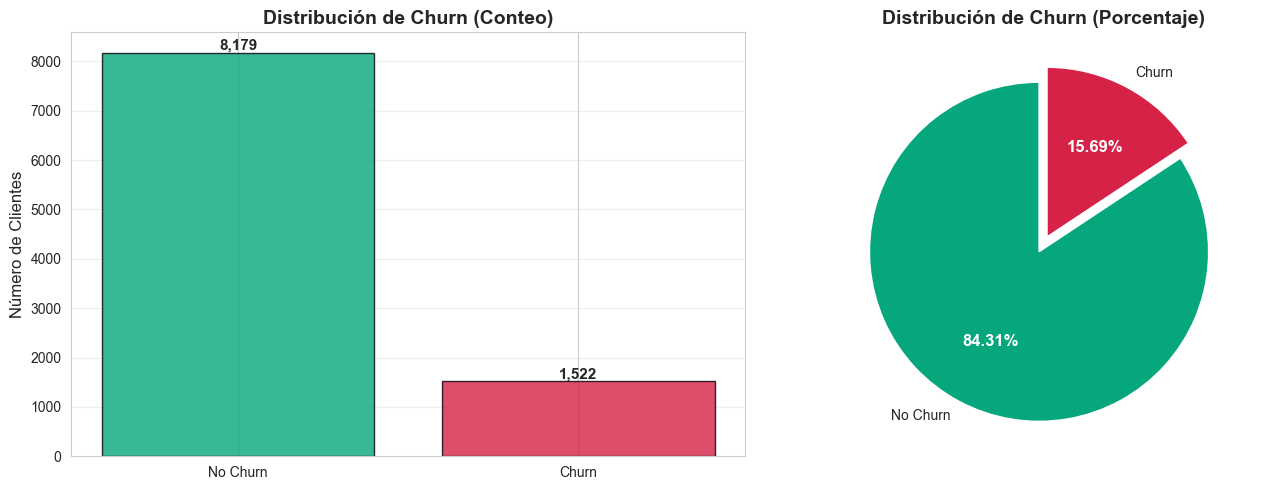

✅ Gráfico guardado: 05_target_distribution.png


In [35]:
# Visualización de la distribución de churn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
ax1 = axes[0]
bars = ax1.bar(['No Churn', 'Churn'], churn_counts.values, 
               color=[COLORS['no_churn'], COLORS['churn']], alpha=0.8, edgecolor='black')
ax1.set_title('Distribución de Churn (Conteo)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Número de Clientes', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Gráfico de pastel
ax2 = axes[1]
colors_pie = [COLORS['no_churn'], COLORS['churn']]
wedges, texts, autotexts = ax2.pie(churn_counts.values, 
                                     labels=['No Churn', 'Churn'],
                                     autopct='%1.2f%%',
                                     colors=colors_pie,
                                     startangle=90,
                                     explode=(0.05, 0.05))
ax2.set_title('Distribución de Churn (Porcentaje)', fontsize=14, fontweight='bold')

# Mejorar estilo de los textos
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.savefig(FIGURES_PATH / '05_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 05_target_distribution.png")

### 3.2. Distribución de Variables Numéricas Clave

In [36]:
# Identificar variables numéricas originales (antes de encoding)
# Cargar dataset original para análisis
df_original = pd.read_csv(Path("../../data/data.csv"))

# Variables numéricas clave para análisis
key_numeric_vars = [
    'edad', 'antiguedad', 'cargo_mensual', 'ingresos_totales',
    'score_riesgo', 'conexiones_mensuales', 'dias_activos_semanales',
    'errores_pago', 'tickets_soporte'
]

print("📊 Variables numéricas clave para análisis:")
print()
for var in key_numeric_vars:
    print(f"  - {var}")

📊 Variables numéricas clave para análisis:

  - edad
  - antiguedad
  - cargo_mensual
  - ingresos_totales
  - score_riesgo
  - conexiones_mensuales
  - dias_activos_semanales
  - errores_pago
  - tickets_soporte


In [37]:
# Estadísticas descriptivas de variables clave
print("📈 Estadísticas Descriptivas:")
print()
df_original[key_numeric_vars].describe().round(2)

📈 Estadísticas Descriptivas:



,edad,antiguedad,cargo_mensual,ingresos_totales,score_riesgo,conexiones_mensuales,dias_activos_semanales,errores_pago,tickets_soporte
count,8925.00,9701.00,9701.00,9701.00,9701.00,9701.00,9701.00,9701.0,9701.00
mean,43.97,32.90,89.25,3208.12,2.18,83.10,4.95,0.6,3.21
std,12.25,25.61,49.15,3469.56,3.88,39.67,1.68,1.4,2.93
min,18.00,0.00,15.00,0.00,0.00,5.00,1.00,0.0,0.00
25%,35.00,9.00,48.28,488.04,0.11,52.00,4.00,0.0,1.00
50%,44.00,29.00,90.62,1705.55,0.27,84.00,5.00,0.0,2.00
75%,53.00,56.00,127.66,5155.84,0.78,118.00,6.00,1.0,4.00
max,74.00,179.00,342.32,29237.58,12.00,149.00,7.00,11.0,24.00


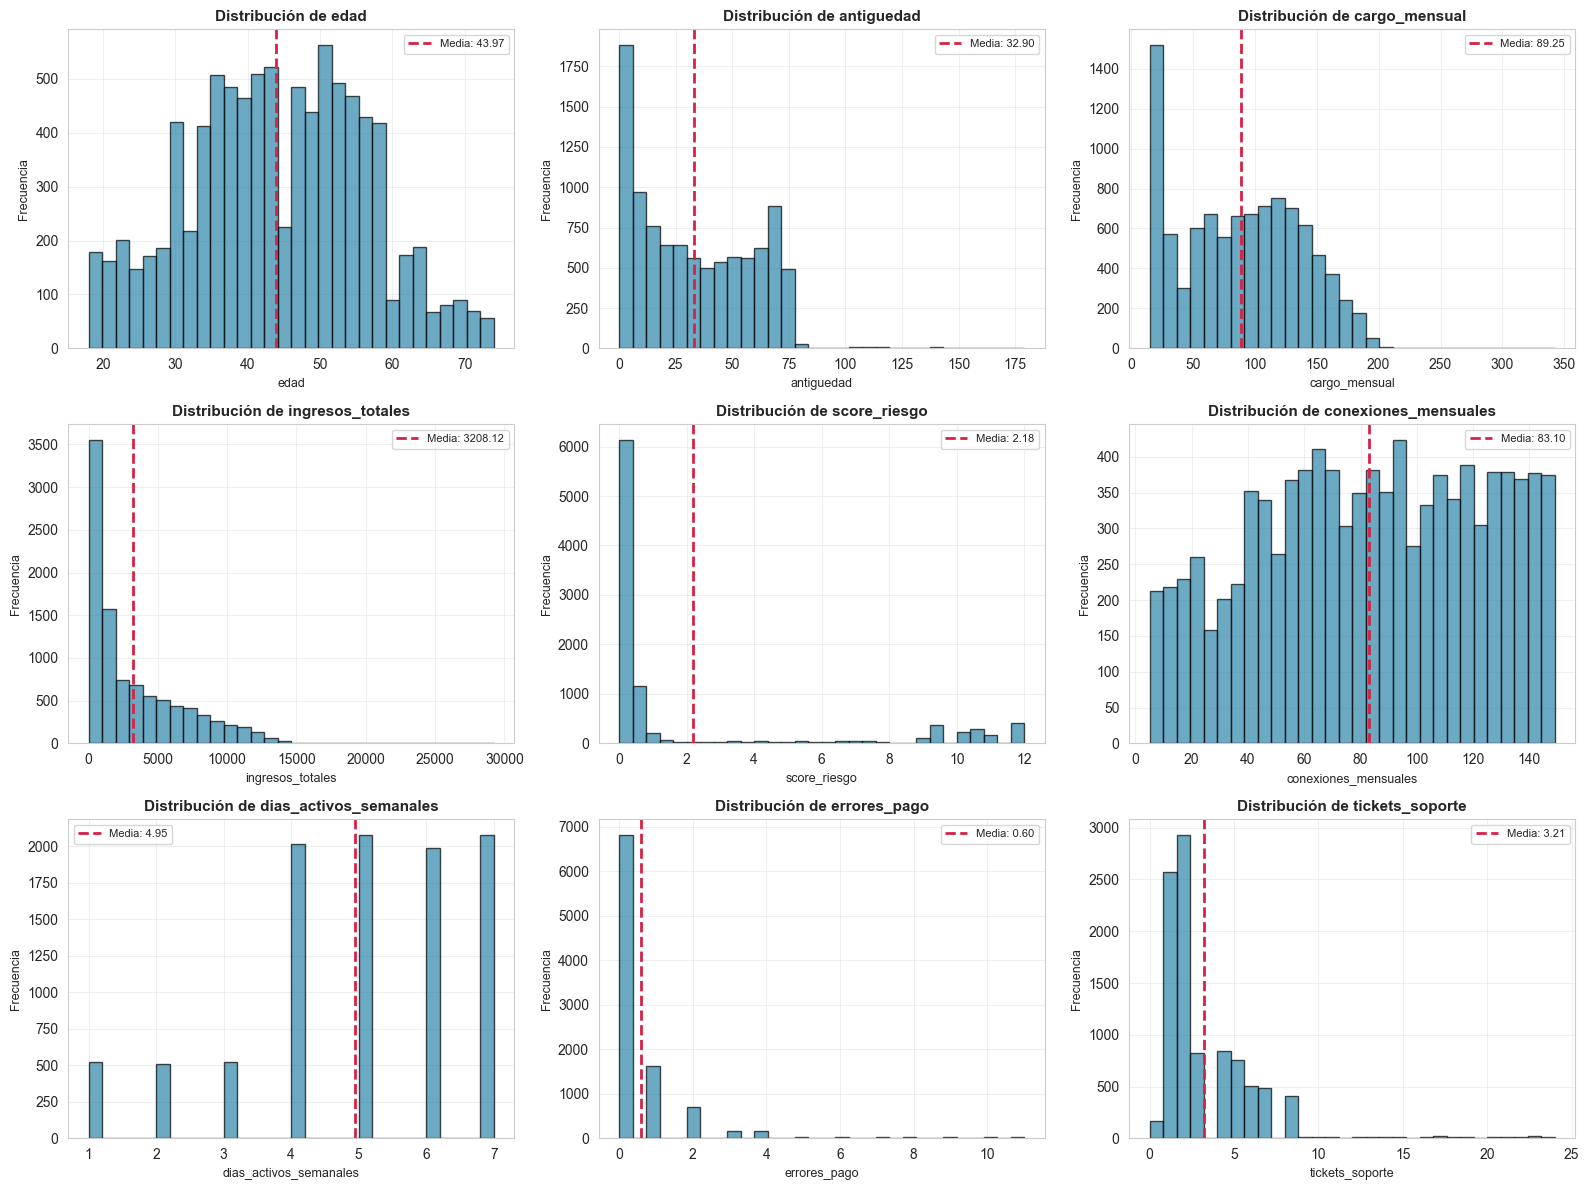

✅ Gráfico guardado: 05_numeric_distributions.png


In [38]:
# Visualización de distribuciones
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, var in enumerate(key_numeric_vars):
    ax = axes[idx]
    
    # Histograma con KDE
    ax.hist(df_original[var].dropna(), bins=30, alpha=0.7, 
            color=COLORS['primary'], edgecolor='black')
    
    # Agregar línea vertical de la media
    mean_val = df_original[var].mean()
    ax.axvline(mean_val, color=COLORS['danger'], linestyle='--', 
               linewidth=2, label=f'Media: {mean_val:.2f}')
    
    ax.set_title(f'Distribución de {var}', fontsize=11, fontweight='bold')
    ax.set_xlabel(var, fontsize=9)
    ax.set_ylabel('Frecuencia', fontsize=9)
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES_PATH / '05_numeric_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 05_numeric_distributions.png")

### 3.3. Distribución de Variables Categóricas Clave

In [39]:
# Variables categóricas clave
key_categorical_vars = [
    'genero', 'segmento_cliente', 'tipo_contrato', 'metodo_pago',
    'tipo_internet', 'nivel_riesgo'
]

print("📊 Variables categóricas clave:")
print()
for var in key_categorical_vars:
    if var in df_original.columns:
        unique_count = df_original[var].nunique()
        print(f"  - {var}: {unique_count} categorías")

📊 Variables categóricas clave:

  - genero: 2 categorías
  - segmento_cliente: 3 categorías
  - tipo_contrato: 3 categorías
  - metodo_pago: 4 categorías
  - tipo_internet: 3 categorías
  - nivel_riesgo: 5 categorías


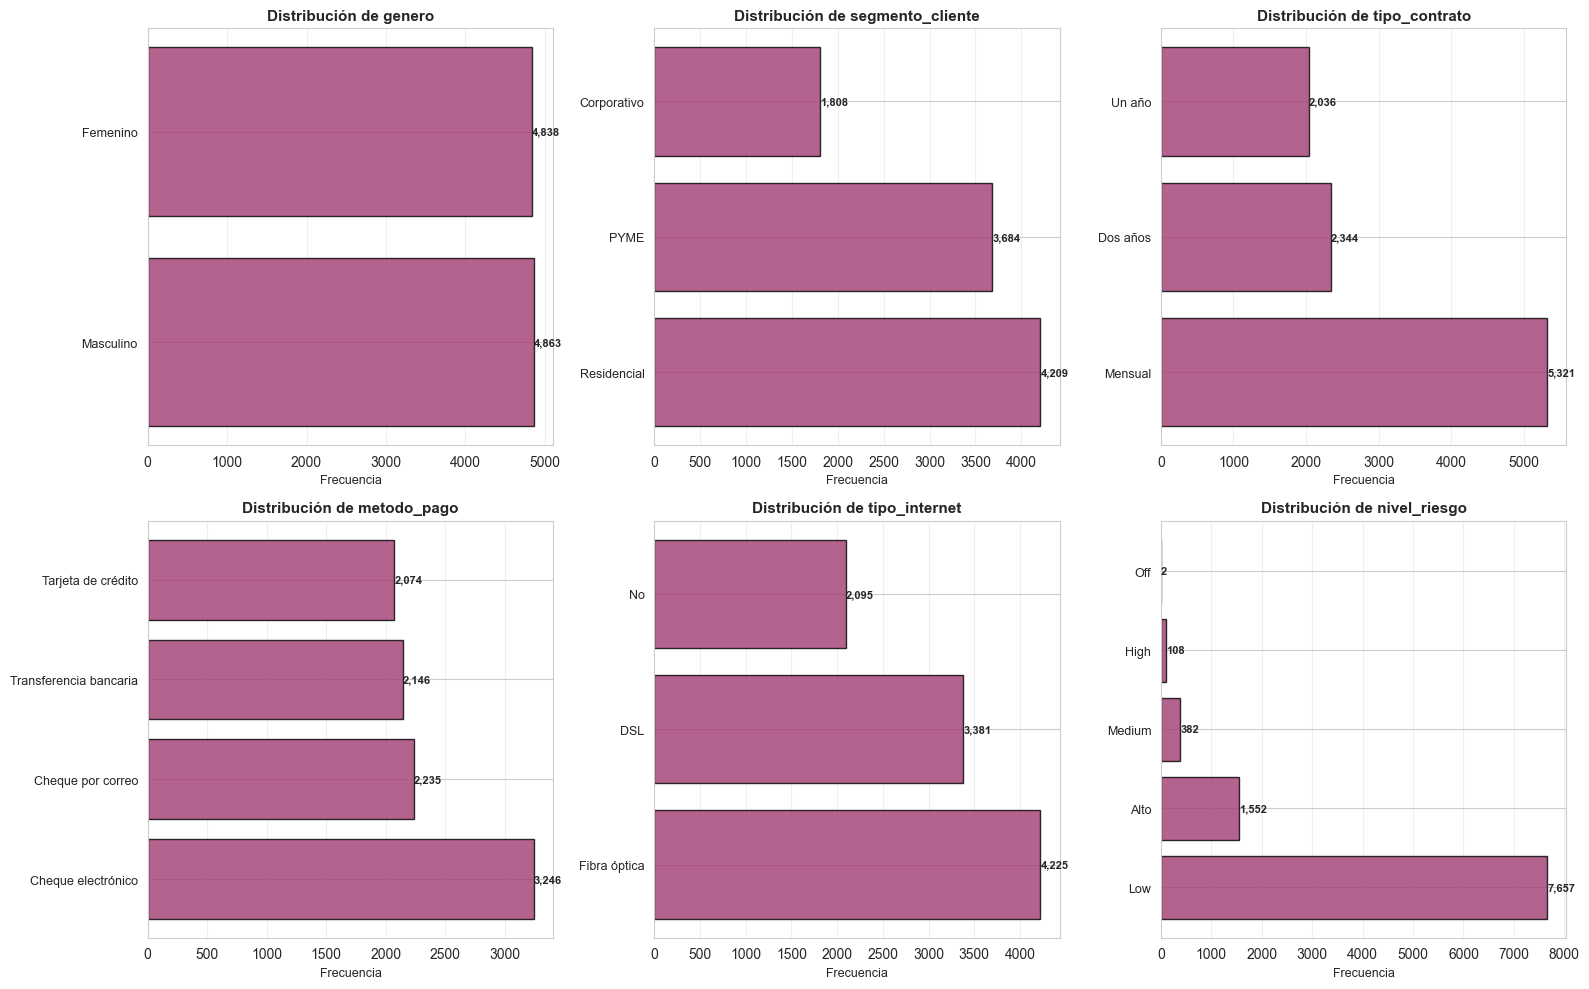

✅ Gráfico guardado: 05_categorical_distributions.png


In [40]:
# Visualización de variables categóricas
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, var in enumerate(key_categorical_vars):
    if var in df_original.columns:
        ax = axes[idx]
        
        # Contar valores
        value_counts = df_original[var].value_counts()
        
        # Gráfico de barras horizontal
        bars = ax.barh(range(len(value_counts)), value_counts.values,
                       color=COLORS['secondary'], alpha=0.8, edgecolor='black')
        
        ax.set_yticks(range(len(value_counts)))
        ax.set_yticklabels(value_counts.index, fontsize=9)
        ax.set_xlabel('Frecuencia', fontsize=9)
        ax.set_title(f'Distribución de {var}', fontsize=11, fontweight='bold')
        ax.grid(axis='x', alpha=0.3)
        
        # Agregar valores en las barras
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax.text(width, bar.get_y() + bar.get_height()/2.,
                   f'{int(width):,}',
                   ha='left', va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig(FIGURES_PATH / '05_categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 05_categorical_distributions.png")

---
## 4. Análisis Bivariado

### 4.1. Variables Numéricas vs Churn

In [41]:
# Análisis de variables numéricas por grupo de churn
print("📊 Comparación de variables numéricas por Churn:")
print()

comparison_df = pd.DataFrame()

for var in key_numeric_vars:
    no_churn_mean = df_original[df_original['cancelacion'] == 0][var].mean()
    churn_mean = df_original[df_original['cancelacion'] == 1][var].mean()
    diff_pct = ((churn_mean - no_churn_mean) / no_churn_mean) * 100
    
    comparison_df = pd.concat([comparison_df, pd.DataFrame({
        'Variable': [var],
        'No_Churn_Mean': [no_churn_mean],
        'Churn_Mean': [churn_mean],
        'Diff_%': [diff_pct]
    })], ignore_index=True)

comparison_df = comparison_df.sort_values('Diff_%', ascending=False, key=abs)
comparison_df

📊 Comparación de variables numéricas por Churn:



,Variable,No_Churn_Mean,Churn_Mean,Diff_%
4,score_riesgo,0.900241,9.081338,908.767216
7,errores_pago,0.448343,1.414586,215.514030
8,tickets_soporte,2.707299,5.932983,119.147664
5,conexiones_mensuales,92.578799,32.177398,-65.243232
1,antiguedad,36.300893,14.616951,-59.733906
3,ingresos_totales,3512.298016,1573.485769,-55.200676
6,dias_activos_semanales,5.403717,2.480289,-54.100313
2,cargo_mensual,86.604142,103.497129,19.505980
0,edad,43.944289,44.114672,0.387725


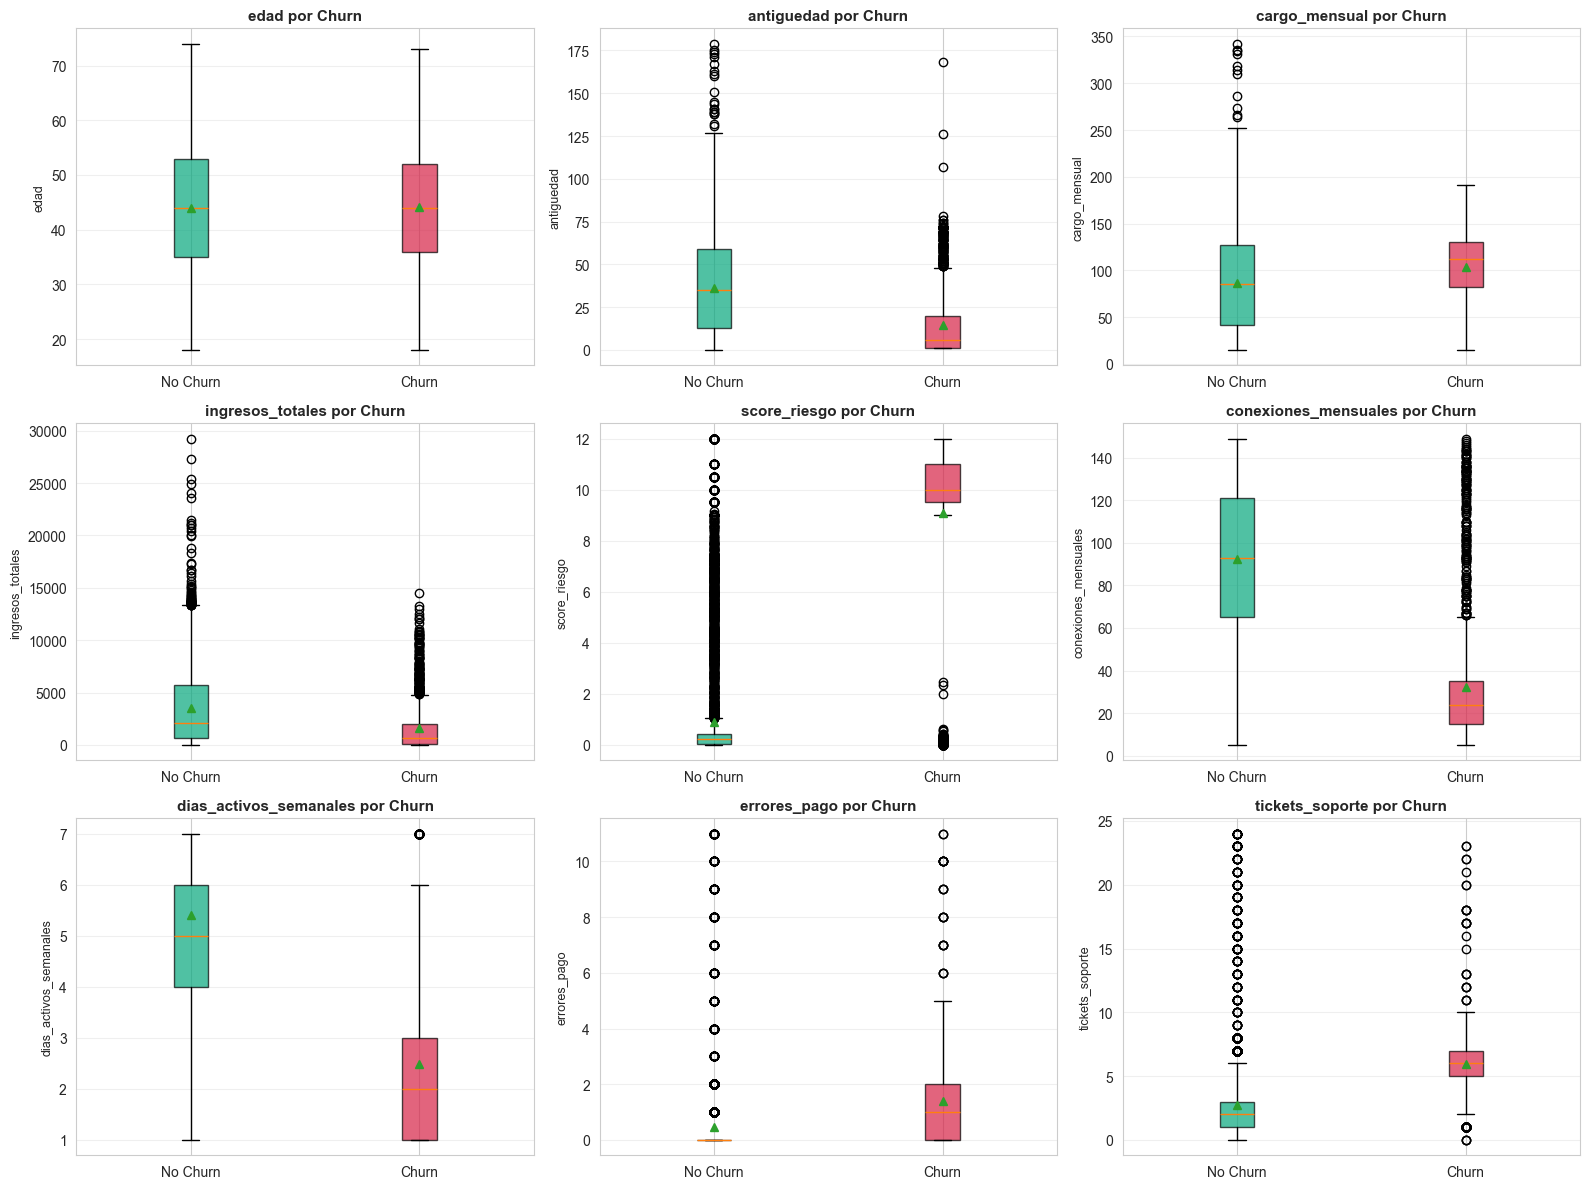

✅ Gráfico guardado: 05_numeric_vs_churn.png


In [42]:
# Visualización de boxplots por churn
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, var in enumerate(key_numeric_vars):
    ax = axes[idx]
    
    # Preparar datos
    data_to_plot = [
        df_original[df_original['cancelacion'] == 0][var].dropna(),
        df_original[df_original['cancelacion'] == 1][var].dropna()
    ]
    
    # Boxplot
    bp = ax.boxplot(data_to_plot, labels=['No Churn', 'Churn'],
                    patch_artist=True, showmeans=True)
    
    # Colorear cajas
    bp['boxes'][0].set_facecolor(COLORS['no_churn'])
    bp['boxes'][1].set_facecolor(COLORS['churn'])
    
    for box in bp['boxes']:
        box.set_alpha(0.7)
    
    ax.set_title(f'{var} por Churn', fontsize=11, fontweight='bold')
    ax.set_ylabel(var, fontsize=9)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES_PATH / '05_numeric_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 05_numeric_vs_churn.png")

### 4.2. Variables Categóricas vs Churn

In [43]:
# Análisis de churn rate por categoría
print("📊 Tasa de Churn por Variable Categórica:")
print()

churn_rates = {}

for var in key_categorical_vars:
    if var in df_original.columns:
        churn_rate = df_original.groupby(var)['cancelacion'].mean() * 100
        churn_rates[var] = churn_rate
        
        print(f"\n{var}:")
        for category, rate in churn_rate.items():
            print(f"  {category}: {rate:.2f}%")

📊 Tasa de Churn por Variable Categórica:


genero:
  Femenino: 16.27%
  Masculino: 15.11%

segmento_cliente:
  Corporativo: 3.93%
  PYME: 28.01%
  Residencial: 9.95%

tipo_contrato:
  Dos años: 2.99%
  Mensual: 24.62%
  Un año: 6.97%

metodo_pago:
  Cheque electrónico: 27.08%
  Cheque por correo: 12.04%
  Tarjeta de crédito: 8.49%
  Transferencia bancaria: 9.23%

tipo_internet:
  DSL: 8.93%
  Fibra óptica: 26.44%
  No: 4.92%

nivel_riesgo:
  Alto: 84.41%
  High: 0.00%
  Low: 2.77%
  Medium: 0.00%
  Off: 0.00%


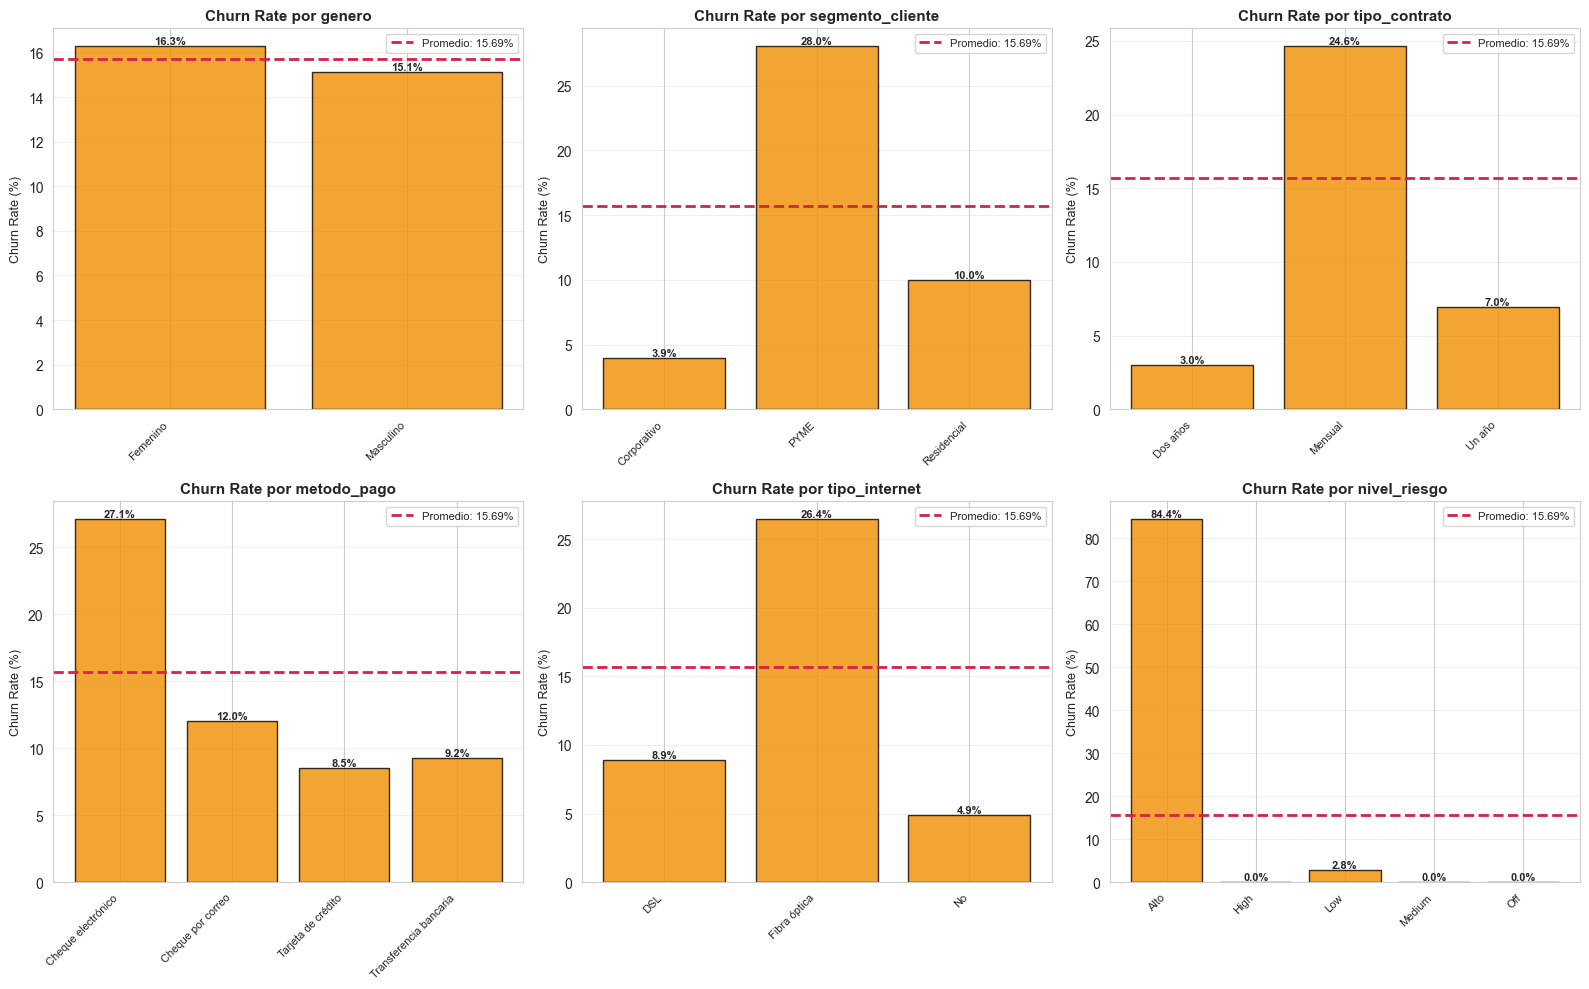

✅ Gráfico guardado: 05_categorical_vs_churn.png


In [44]:
# Visualización de churn rate por categoría
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, var in enumerate(key_categorical_vars):
    if var in df_original.columns:
        ax = axes[idx]
        
        # Calcular churn rate
        churn_rate = df_original.groupby(var)['cancelacion'].mean() * 100
        
        # Gráfico de barras
        bars = ax.bar(range(len(churn_rate)), churn_rate.values,
                      color=COLORS['warning'], alpha=0.8, edgecolor='black')
        
        ax.set_xticks(range(len(churn_rate)))
        ax.set_xticklabels(churn_rate.index, rotation=45, ha='right', fontsize=8)
        ax.set_ylabel('Churn Rate (%)', fontsize=9)
        ax.set_title(f'Churn Rate por {var}', fontsize=11, fontweight='bold')
        ax.grid(axis='y', alpha=0.3)
        
        # Línea de referencia (churn rate promedio)
        avg_churn = df_original['cancelacion'].mean() * 100
        ax.axhline(avg_churn, color=COLORS['danger'], linestyle='--', 
                  linewidth=2, label=f'Promedio: {avg_churn:.2f}%')
        ax.legend(fontsize=8)
        
        # Agregar valores en las barras
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}%',
                   ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig(FIGURES_PATH / '05_categorical_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 05_categorical_vs_churn.png")

---
## 5. Análisis de Correlaciones

### 5.1. Matriz de Correlación (Variables Numéricas)

In [45]:
# Calcular matriz de correlación
correlation_matrix = df_original[key_numeric_vars + ['cancelacion']].corr()

print("📊 Matriz de Correlación:")
print()
correlation_matrix.round(3)

📊 Matriz de Correlación:



,edad,antiguedad,cargo_mensual,ingresos_totales,score_riesgo,conexiones_mensuales,dias_activos_semanales,errores_pago,tickets_soporte,cancelacion
edad,1.000,0.119,0.221,0.202,-0.011,0.004,-0.004,0.009,-0.005,0.005
antiguedad,0.119,1.000,0.216,0.776,-0.441,0.255,0.299,-0.122,-0.319,-0.308
cargo_mensual,0.221,0.216,1.000,0.673,0.152,-0.111,-0.112,0.047,0.119,0.125
ingresos_totales,0.202,0.776,0.673,1.000,-0.286,0.164,0.198,-0.078,-0.181,-0.203
score_riesgo,-0.011,-0.441,0.152,-0.286,1.000,-0.637,-0.720,0.291,0.580,0.767
conexiones_mensuales,0.004,0.255,-0.111,0.164,-0.637,1.000,0.516,-0.207,-0.342,-0.554
dias_activos_semanales,-0.004,0.299,-0.112,0.198,-0.720,0.516,1.000,-0.237,-0.386,-0.634
errores_pago,0.009,-0.122,0.047,-0.078,0.291,-0.207,-0.237,1.000,0.695,0.251
tickets_soporte,-0.005,-0.319,0.119,-0.181,0.580,-0.342,-0.386,0.695,1.000,0.400
cancelacion,0.005,-0.308,0.125,-0.203,0.767,-0.554,-0.634,0.251,0.400,1.000


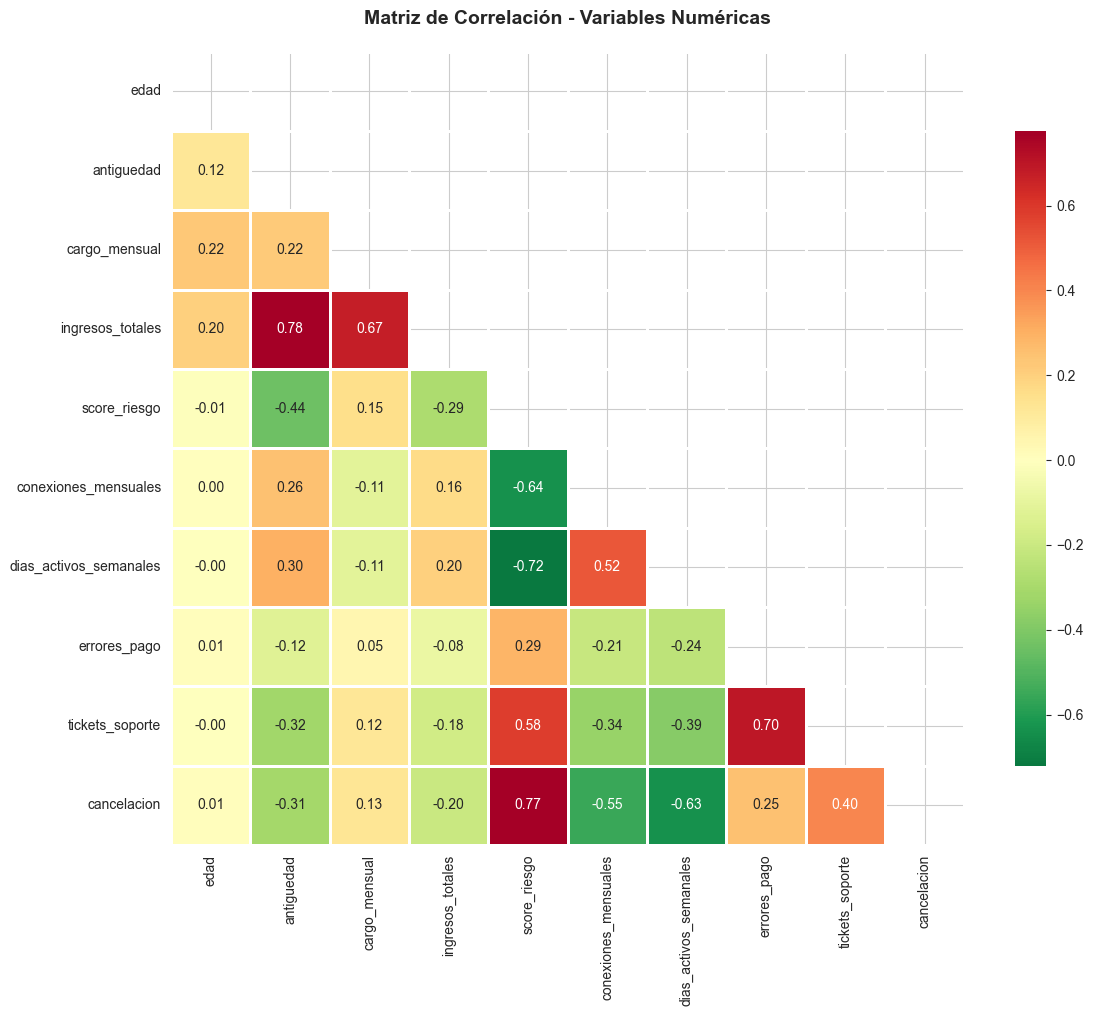

✅ Gráfico guardado: 05_correlation_matrix.png


In [46]:
# Visualización de la matriz de correlación
plt.figure(figsize=(12, 10))

# Heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlGn_r', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})

plt.title('Matriz de Correlación - Variables Numéricas', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(FIGURES_PATH / '05_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 05_correlation_matrix.png")

### 5.2. Correlación con la Variable Objetivo (Churn)

In [47]:
# Correlación con churn
churn_correlation = correlation_matrix['cancelacion'].drop('cancelacion').sort_values(ascending=False, key=abs)

print("🎯 Correlación con Churn (ordenado por valor absoluto):")
print()
for var, corr in churn_correlation.items():
    print(f"  {var:30s}: {corr:7.4f}")

🎯 Correlación con Churn (ordenado por valor absoluto):

  score_riesgo                  :  0.7672
  dias_activos_semanales        : -0.6342
  conexiones_mensuales          : -0.5538
  tickets_soporte               :  0.3998
  antiguedad                    : -0.3080
  errores_pago                  :  0.2511
  ingresos_totales              : -0.2032
  cargo_mensual                 :  0.1250
  edad                          :  0.0051


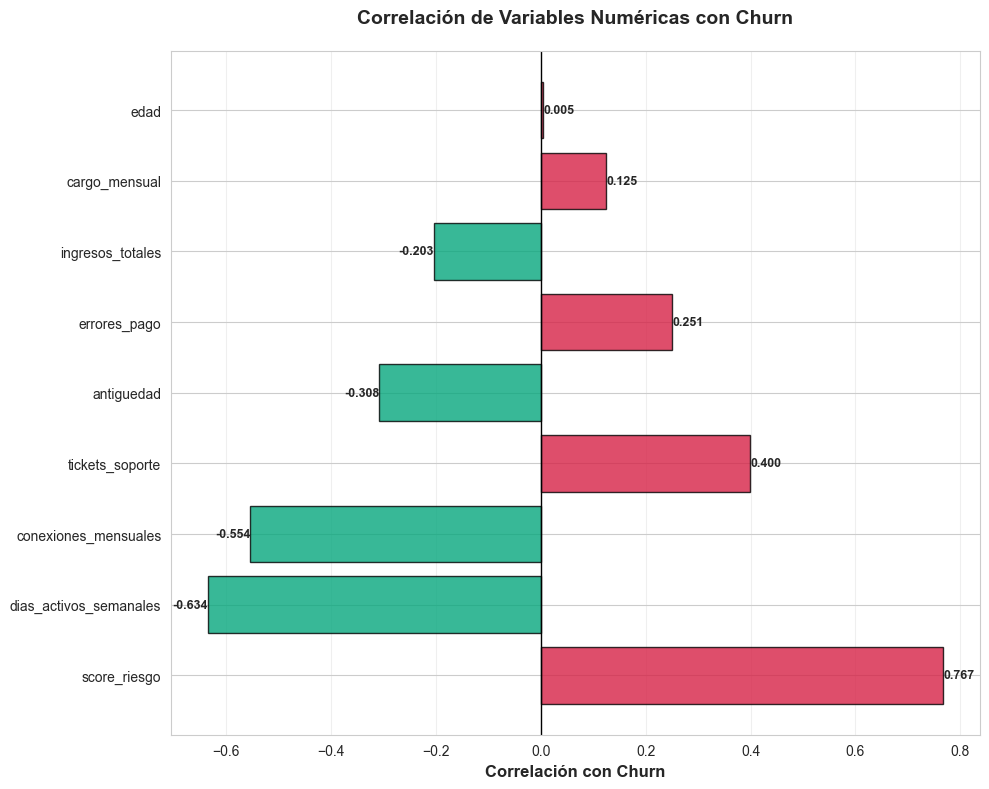

✅ Gráfico guardado: 05_churn_correlation.png


In [48]:
# Visualización de correlación con churn
plt.figure(figsize=(10, 8))

# Gráfico de barras horizontal
colors = [COLORS['danger'] if x > 0 else COLORS['success'] for x in churn_correlation.values]
bars = plt.barh(range(len(churn_correlation)), churn_correlation.values,
                color=colors, alpha=0.8, edgecolor='black')

plt.yticks(range(len(churn_correlation)), churn_correlation.index, fontsize=10)
plt.xlabel('Correlación con Churn', fontsize=12, fontweight='bold')
plt.title('Correlación de Variables Numéricas con Churn', 
          fontsize=14, fontweight='bold', pad=20)
plt.axvline(0, color='black', linewidth=1)
plt.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.3f}',
            ha='left' if width > 0 else 'right', 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig(FIGURES_PATH / '05_churn_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 05_churn_correlation.png")

---
## 6. Análisis de la Variable Objetivo (Churn)

### 6.1. Perfil de Clientes con Churn

In [49]:
# Crear perfil de clientes con churn vs sin churn
print("👥 Perfil de Clientes - Comparación:")
print()

profile_comparison = pd.DataFrame({
    'No_Churn': df_original[df_original['cancelacion'] == 0][key_numeric_vars].mean(),
    'Churn': df_original[df_original['cancelacion'] == 1][key_numeric_vars].mean()
})

profile_comparison['Diferencia_%'] = ((profile_comparison['Churn'] - profile_comparison['No_Churn']) / 
                                       profile_comparison['No_Churn']) * 100

profile_comparison = profile_comparison.sort_values('Diferencia_%', ascending=False, key=abs)
profile_comparison.round(2)

👥 Perfil de Clientes - Comparación:



,No_Churn,Churn,Diferencia_%
score_riesgo,0.90,9.08,908.77
errores_pago,0.45,1.41,215.51
tickets_soporte,2.71,5.93,119.15
conexiones_mensuales,92.58,32.18,-65.24
antiguedad,36.30,14.62,-59.73
ingresos_totales,3512.30,1573.49,-55.20
dias_activos_semanales,5.40,2.48,-54.10
cargo_mensual,86.60,103.50,19.51
edad,43.94,44.11,0.39


In [50]:
# Guardar perfil de clientes
profile_file = REPORTS_PATH / '05_customer_profile_comparison.csv'
profile_comparison.to_csv(profile_file)

print(f"✅ Perfil guardado en: {profile_file}")

✅ Perfil guardado en: ../../outputs/gian/reports/05_customer_profile_comparison.csv


### 6.2. Análisis Temporal del Churn

In [51]:
# Análisis de churn por antigüedad
print("📅 Análisis de Churn por Antigüedad:")
print()

# Crear bins de antigüedad
antiguedad_bins = [0, 6, 12, 24, 36, 100]
antiguedad_labels = ['0-6 meses', '6-12 meses', '12-24 meses', '24-36 meses', '36+ meses']

df_original['antiguedad_grupo'] = pd.cut(df_original['antiguedad'], 
                                          bins=antiguedad_bins, 
                                          labels=antiguedad_labels)

# Calcular churn rate por grupo
churn_by_tenure = df_original.groupby('antiguedad_grupo')['cancelacion'].agg(['mean', 'count'])
churn_by_tenure['churn_rate_%'] = churn_by_tenure['mean'] * 100

print(churn_by_tenure)

📅 Análisis de Churn por Antigüedad:

                      mean  count  churn_rate_%
antiguedad_grupo                               
0-6 meses         0.380811   2022     38.081108
6-12 meses        0.228778    966     22.877847
12-24 meses       0.161967   1383     16.196674
24-36 meses       0.090592   1148      9.059233
36+ meses         0.048579   4117      4.857906


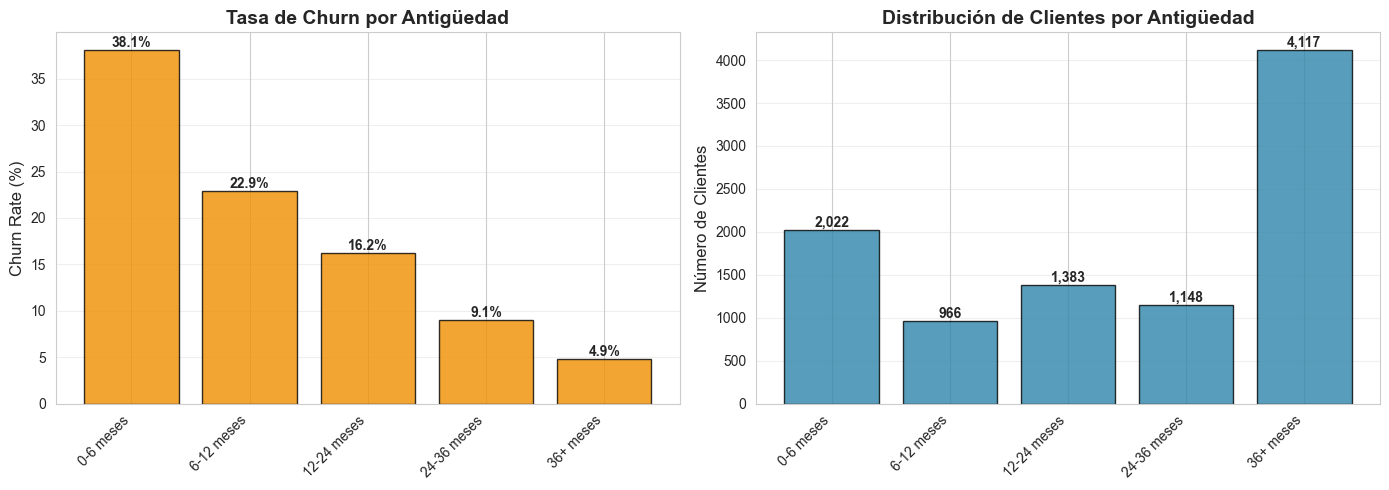

✅ Gráfico guardado: 05_churn_by_tenure.png


In [52]:
# Visualización de churn por antigüedad
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Churn rate por antigüedad
ax1 = axes[0]
bars = ax1.bar(range(len(churn_by_tenure)), churn_by_tenure['churn_rate_%'].values,
               color=COLORS['warning'], alpha=0.8, edgecolor='black')
ax1.set_xticks(range(len(churn_by_tenure)))
ax1.set_xticklabels(churn_by_tenure.index, rotation=45, ha='right')
ax1.set_ylabel('Churn Rate (%)', fontsize=12)
ax1.set_title('Tasa de Churn por Antigüedad', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Agregar valores
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Gráfico 2: Distribución de clientes por antigüedad
ax2 = axes[1]
bars2 = ax2.bar(range(len(churn_by_tenure)), churn_by_tenure['count'].values,
                color=COLORS['primary'], alpha=0.8, edgecolor='black')
ax2.set_xticks(range(len(churn_by_tenure)))
ax2.set_xticklabels(churn_by_tenure.index, rotation=45, ha='right')
ax2.set_ylabel('Número de Clientes', fontsize=12)
ax2.set_title('Distribución de Clientes por Antigüedad', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Agregar valores
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(FIGURES_PATH / '05_churn_by_tenure.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 05_churn_by_tenure.png")

---
## 7. Análisis de Segmentos de Clientes

### 7.1. Churn por Segmento de Cliente

In [53]:
# Análisis por segmento
if 'segmento_cliente' in df_original.columns:
    print("📊 Análisis de Churn por Segmento de Cliente:")
    print()
    
    segment_analysis = df_original.groupby('segmento_cliente').agg({
        'cancelacion': ['mean', 'count'],
        'cargo_mensual': 'mean',
        'ingresos_totales': 'mean',
        'antiguedad': 'mean'
    }).round(2)
    
    segment_analysis.columns = ['Churn_Rate', 'Count', 'Avg_Monthly_Charge', 
                                 'Avg_Total_Revenue', 'Avg_Tenure']
    segment_analysis['Churn_Rate_%'] = segment_analysis['Churn_Rate'] * 100
    
    print(segment_analysis)

📊 Análisis de Churn por Segmento de Cliente:

                  Churn_Rate  Count  Avg_Monthly_Charge  Avg_Total_Revenue  \
segmento_cliente                                                             
Corporativo             0.04   1808              150.06            8259.95   
PYME                    0.28   3684              112.09            3243.80   
Residencial             0.10   4209               43.14            1006.84   

                  Avg_Tenure  Churn_Rate_%  
segmento_cliente                            
Corporativo            55.47           4.0  
PYME                   30.13          28.0  
Residencial            25.63          10.0  


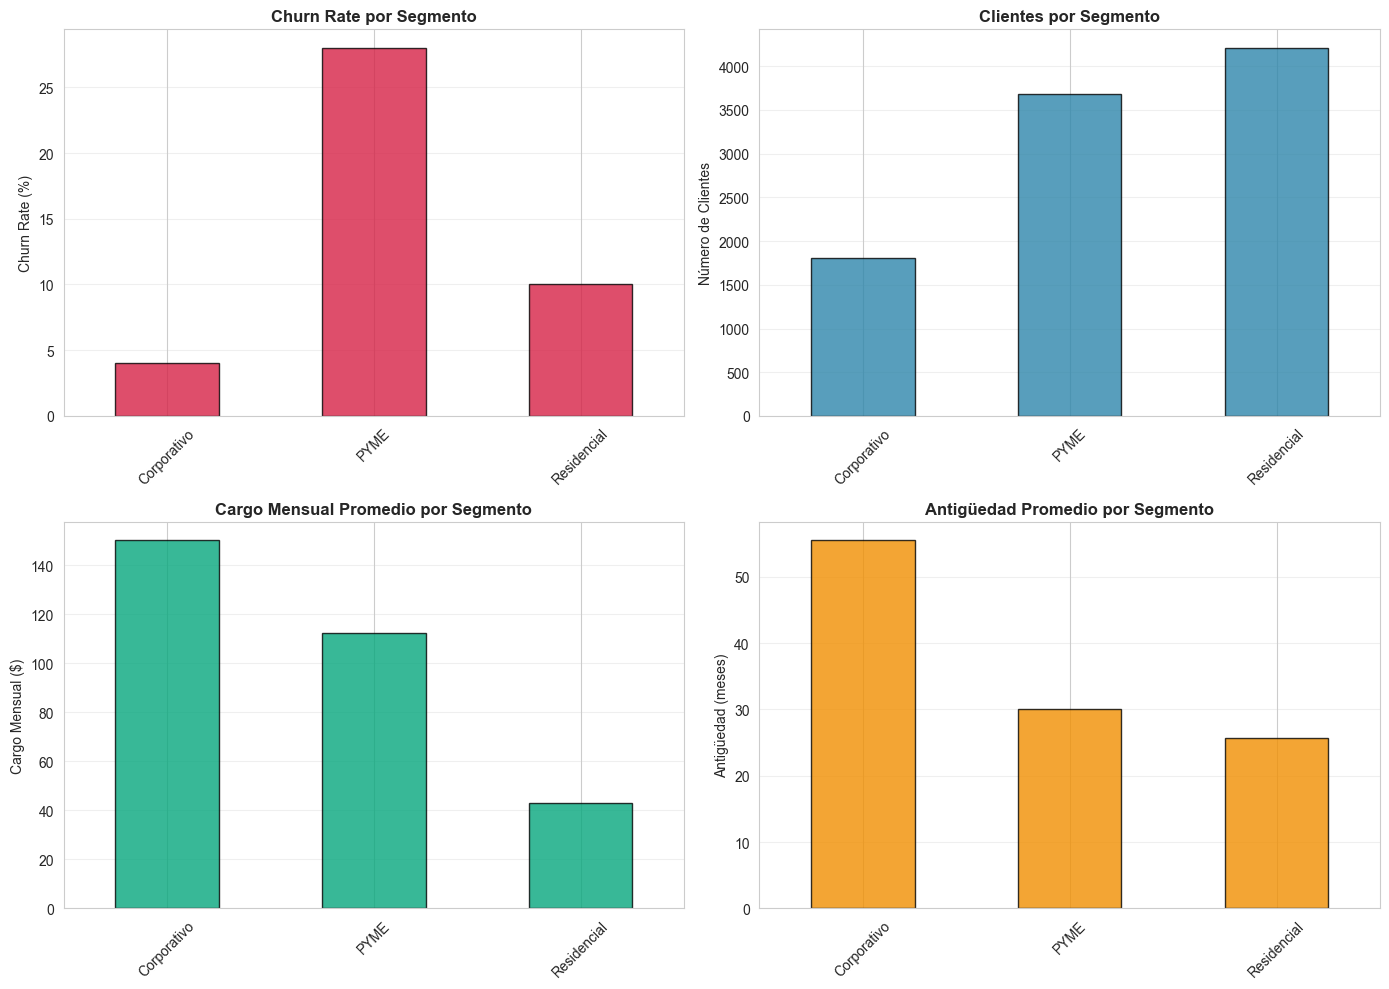

✅ Gráfico guardado: 05_segment_analysis.png


In [54]:
# Visualización por segmento
if 'segmento_cliente' in df_original.columns:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Churn rate por segmento
    ax1 = axes[0, 0]
    segment_analysis['Churn_Rate_%'].plot(kind='bar', ax=ax1, 
                                           color=COLORS['danger'], alpha=0.8, edgecolor='black')
    ax1.set_title('Churn Rate por Segmento', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Churn Rate (%)')
    ax1.set_xlabel('')
    ax1.grid(axis='y', alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # Número de clientes por segmento
    ax2 = axes[0, 1]
    segment_analysis['Count'].plot(kind='bar', ax=ax2, 
                                    color=COLORS['primary'], alpha=0.8, edgecolor='black')
    ax2.set_title('Clientes por Segmento', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Número de Clientes')
    ax2.set_xlabel('')
    ax2.grid(axis='y', alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)
    
    # Cargo mensual promedio por segmento
    ax3 = axes[1, 0]
    segment_analysis['Avg_Monthly_Charge'].plot(kind='bar', ax=ax3, 
                                                  color=COLORS['success'], alpha=0.8, edgecolor='black')
    ax3.set_title('Cargo Mensual Promedio por Segmento', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Cargo Mensual ($)')
    ax3.set_xlabel('')
    ax3.grid(axis='y', alpha=0.3)
    ax3.tick_params(axis='x', rotation=45)
    
    # Antigüedad promedio por segmento
    ax4 = axes[1, 1]
    segment_analysis['Avg_Tenure'].plot(kind='bar', ax=ax4, 
                                         color=COLORS['warning'], alpha=0.8, edgecolor='black')
    ax4.set_title('Antigüedad Promedio por Segmento', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Antigüedad (meses)')
    ax4.set_xlabel('')
    ax4.grid(axis='y', alpha=0.3)
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig(FIGURES_PATH / '05_segment_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Gráfico guardado: 05_segment_analysis.png")

### 7.2. Churn por Nivel de Riesgo

In [55]:
# Análisis por nivel de riesgo
if 'nivel_riesgo' in df_original.columns:
    print("⚠️ Análisis de Churn por Nivel de Riesgo:")
    print()
    
    risk_analysis = df_original.groupby('nivel_riesgo').agg({
        'cancelacion': ['mean', 'count'],
        'score_riesgo': 'mean'
    }).round(2)
    
    risk_analysis.columns = ['Churn_Rate', 'Count', 'Avg_Risk_Score']
    risk_analysis['Churn_Rate_%'] = risk_analysis['Churn_Rate'] * 100
    
    print(risk_analysis)

⚠️ Análisis de Churn por Nivel de Riesgo:

              Churn_Rate  Count  Avg_Risk_Score  Churn_Rate_%
nivel_riesgo                                                 
Alto                0.84   1552           10.54          84.0
High                0.00    108            7.72           0.0
Low                 0.03   7657            0.27           3.0
Medium              0.00    382            5.01           0.0
Off                 0.00      2            9.10           0.0


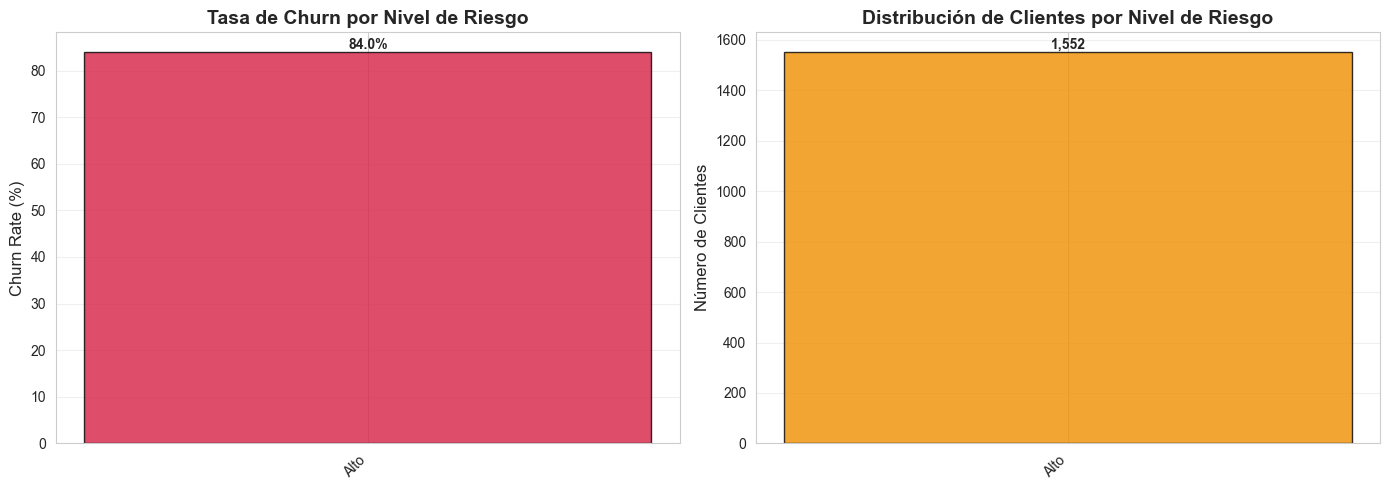

✅ Gráfico guardado: 05_risk_analysis.png


In [56]:
# Visualización por nivel de riesgo
if 'nivel_riesgo' in df_original.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Churn rate por nivel de riesgo
    ax1 = axes[0]
    risk_order = ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']
    risk_analysis_sorted = risk_analysis.reindex([r for r in risk_order if r in risk_analysis.index])
    
    bars = ax1.bar(range(len(risk_analysis_sorted)), risk_analysis_sorted['Churn_Rate_%'].values,
                   color=COLORS['danger'], alpha=0.8, edgecolor='black')
    ax1.set_xticks(range(len(risk_analysis_sorted)))
    ax1.set_xticklabels(risk_analysis_sorted.index, rotation=45, ha='right')
    ax1.set_ylabel('Churn Rate (%)', fontsize=12)
    ax1.set_title('Tasa de Churn por Nivel de Riesgo', fontsize=14, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)
    
    # Agregar valores
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Distribución de clientes por nivel de riesgo
    ax2 = axes[1]
    bars2 = ax2.bar(range(len(risk_analysis_sorted)), risk_analysis_sorted['Count'].values,
                    color=COLORS['warning'], alpha=0.8, edgecolor='black')
    ax2.set_xticks(range(len(risk_analysis_sorted)))
    ax2.set_xticklabels(risk_analysis_sorted.index, rotation=45, ha='right')
    ax2.set_ylabel('Número de Clientes', fontsize=12)
    ax2.set_title('Distribución de Clientes por Nivel de Riesgo', fontsize=14, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)
    
    # Agregar valores
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(FIGURES_PATH / '05_risk_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Gráfico guardado: 05_risk_analysis.png")

---
## 8. Conclusiones y Hallazgos Clave

In [57]:
# Generar reporte de hallazgos clave
print("📋 HALLAZGOS CLAVE DEL ANÁLISIS EXPLORATORIO")
print("=" * 60)
print()

# 1. Distribución de Churn
churn_rate = df_original['cancelacion'].mean() * 100
print(f"1. TASA DE CHURN GENERAL: {churn_rate:.2f}%")
print()

# 2. Variables más correlacionadas con churn
print("2. VARIABLES MÁS CORRELACIONADAS CON CHURN:")
top_corr = churn_correlation.head(5)
for var, corr in top_corr.items():
    print(f"   - {var}: {corr:.4f}")
print()

# 3. Diferencias significativas entre grupos
print("3. DIFERENCIAS SIGNIFICATIVAS (Churn vs No Churn):")
top_diff = profile_comparison.head(5)
for var in top_diff.index:
    diff = top_diff.loc[var, 'Diferencia_%']
    print(f"   - {var}: {diff:+.1f}%")
print()

# 4. Segmentos de mayor riesgo
if 'segmento_cliente' in df_original.columns:
    print("4. SEGMENTOS DE MAYOR RIESGO:")
    top_segments = segment_analysis.sort_values('Churn_Rate_%', ascending=False).head(3)
    for segment in top_segments.index:
        rate = top_segments.loc[segment, 'Churn_Rate_%']
        count = int(top_segments.loc[segment, 'Count'])
        print(f"   - {segment}: {rate:.1f}% ({count:,} clientes)")
    print()

# 5. Recomendaciones
print("5. RECOMENDACIONES PARA FEATURE ENGINEERING:")
print("   - Crear features de interacción entre variables correlacionadas")
print("   - Aplicar transformaciones log a variables sesgadas")
print("   - Crear features de ratio (ej: cargo_mensual / ingresos_totales)")
print("   - Considerar features temporales basadas en antigüedad")
print("   - Explorar features de comportamiento de uso")
print()

print("=" * 60)
print("✅ Análisis Exploratorio Completado")

📋 HALLAZGOS CLAVE DEL ANÁLISIS EXPLORATORIO

1. TASA DE CHURN GENERAL: 15.69%

2. VARIABLES MÁS CORRELACIONADAS CON CHURN:
   - score_riesgo: 0.7672
   - dias_activos_semanales: -0.6342
   - conexiones_mensuales: -0.5538
   - tickets_soporte: 0.3998
   - antiguedad: -0.3080

3. DIFERENCIAS SIGNIFICATIVAS (Churn vs No Churn):
   - score_riesgo: +908.8%
   - errores_pago: +215.5%
   - tickets_soporte: +119.1%
   - conexiones_mensuales: -65.2%
   - antiguedad: -59.7%

4. SEGMENTOS DE MAYOR RIESGO:
   - PYME: 28.0% (3,684 clientes)
   - Residencial: 10.0% (4,209 clientes)
   - Corporativo: 4.0% (1,808 clientes)

5. RECOMENDACIONES PARA FEATURE ENGINEERING:
   - Crear features de interacción entre variables correlacionadas
   - Aplicar transformaciones log a variables sesgadas
   - Crear features de ratio (ej: cargo_mensual / ingresos_totales)
   - Considerar features temporales basadas en antigüedad
   - Explorar features de comportamiento de uso

✅ Análisis Exploratorio Completado


In [58]:
# Guardar reporte de EDA
eda_report = {
    'Total_Registros': len(df_original),
    'Churn_Rate_%': churn_rate,
    'Variables_Numericas_Analizadas': len(key_numeric_vars),
    'Variables_Categoricas_Analizadas': len(key_categorical_vars),
    'Top_Correlacion_Churn': churn_correlation.head(1).index[0],
    'Valor_Top_Correlacion': churn_correlation.head(1).values[0],
    'Figuras_Generadas': len(list(FIGURES_PATH.glob('05_*.png')))
}

eda_report_df = pd.DataFrame(eda_report, index=[0]).T
eda_report_df.columns = ['Valor']

# Guardar reporte
report_file = REPORTS_PATH / '05_eda_report.csv'
eda_report_df.to_csv(report_file)

print(f"✅ Reporte de EDA guardado en: {report_file}")
print()
print(eda_report_df)

✅ Reporte de EDA guardado en: ../../outputs/gian/reports/05_eda_report.csv

                                         Valor
Total_Registros                           9701
Churn_Rate_%                         15.689104
Variables_Numericas_Analizadas               9
Variables_Categoricas_Analizadas             6
Top_Correlacion_Churn             score_riesgo
Valor_Top_Correlacion                 0.767249
Figuras_Generadas                           10


---
## 📊 Resumen del Análisis

### ✅ Análisis Completados

1. **Análisis Univariado:**
   - Distribución de la variable objetivo (Churn)
   - Distribuciones de variables numéricas
   - Distribuciones de variables categóricas

2. **Análisis Bivariado:**
   - Relación de variables numéricas con Churn
   - Relación de variables categóricas con Churn
   - Identificación de diferencias significativas

3. **Análisis de Correlaciones:**
   - Matriz de correlación completa
   - Correlaciones con la variable objetivo
   - Identificación de multicolinealidad

4. **Análisis de Segmentos:**
   - Churn por segmento de cliente
   - Churn por nivel de riesgo
   - Churn por antigüedad

### 📁 Outputs Generados

**Figuras:**
- `05_target_distribution.png`
- `05_numeric_distributions.png`
- `05_categorical_distributions.png`
- `05_numeric_vs_churn.png`
- `05_categorical_vs_churn.png`
- `05_correlation_matrix.png`
- `05_churn_correlation.png`
- `05_churn_by_tenure.png`
- `05_segment_analysis.png`
- `05_risk_analysis.png`

**Reportes:**
- `05_eda_report.csv`
- `05_customer_profile_comparison.csv`

### 🎯 Próximo Paso

**Notebook 06: Feature Engineering**
- Creación de nuevas features basadas en hallazgos del EDA
- Transformaciones matemáticas de variables sesgadas
- Features de interacción
- Features temporales y de comportamiento